#**📊 A/B Testing Project: Evaluating Button Color Impact on User Conversions**

**Description:**

This project performs a rigorous A/B testing analysis to evaluate the impact of two different button color variants on user conversion rates for an e-commerce platform. Using a real-world dataset from Kaggle, the study follows a structured approach including data exploration, assumption verification (normality and homogeneity of variances), and selection of appropriate statistical tests to compare the groups. Key metrics such as conversion rates and user engagement are analyzed through detailed visualizations like histograms and Q-Q plots. The project calculates effect sizes and statistical power to assess the practical significance and reliability of the findings. The results provide clear evidence to inform design decisions, demonstrating whether the new button color leads to statistically and practically significant improvements in user behavior, ensuring data-driven optimization of the user interface.

##🔗 **Dataset Selection**



We'll utilize the "A/B Testing for Button Color Variants Dataset" from Kaggle, which is under 1MB and ideal for our analysis. This synthetic dataset simulates user interactions with two different button colors, tracking clicks and conversions.

Dataset Link: [A/B Testing for Button Color Variants Dataset](https://www.kaggle.com/datasets/tathagatachowdhury09/ab-testing-for-button-color-variants-dataset)

##**🧠 1. Business Scenario & Objective**

**Scenario:** An e-commerce platform is experimenting with two button colors (Blue and Green) to determine which color leads to higher user conversions.

**Objective:** Assess whether the change in button color significantly affects the conversion rate, guiding UI design decisions.

##**📚 2. Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')

##**📥 3. Data Loading & Preliminary Exploration**

In [ ]:
#load file stopword
from google.colab import files
files.upload()


In [3]:
# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your CSV file
df = pd.read_csv('ab_data.csv', encoding='utf-8')

In [4]:
# Preview the dataset
df.head()

,User_ID,Variant,Clicks,Conversions
0,2721,A,3,0
1,2241,A,2,0
2,9808,A,16,0
3,3804,A,3,0
4,4391,A,9,0


**Dataset Overview:**

*   **User_ID:** Unique identifier for each user.

*   **Variant:** Indicates the group; 'A' for Control (Blue button), 'B' for Treatment (Green button).

*   **Clicks:** Number of clicks by the user.

*   **Conversions:** Binary indicator (0 or 1) of whether the user converted.


##**🔍 4. Data Cleaning & Preparation**

Data cleaning and preparation are critical initial steps in any data analysis project, including A/B testing, to ensure the accuracy and validity of the results. In this project, we perform data cleaning to handle any missing or inconsistent values that could bias the analysis or cause errors during testing. For example, ensuring that the 'Variant' column is correctly formatted as a categorical variable allows us to correctly segment users into control and treatment groups. Checking for and addressing missing data prevents skewed conversion rates or engagement metrics. This step also includes generating summary statistics to understand the basic properties and distributions of the data, helping to identify any anomalies or outliers. Proper data preparation guarantees that the assumptions required for subsequent statistical tests, such as normality and equal variances, are more likely to hold, which leads to more reliable and interpretable A/B testing results.

In [5]:
# Check for missing values
df.isnull().sum()

# Ensure 'Variant' is categorical
df['Variant'] = df['Variant'].astype('category')

# Summary statistics
df.describe()


,User_ID,Clicks,Conversions
count,20000.000000,20000.000000,20000.000000
mean,10000.500000,9.513450,0.034600
std,5773.647028,5.768603,0.182769
min,1.000000,0.000000,0.000000
25%,5000.750000,5.000000,0.000000
50%,10000.500000,10.000000,0.000000
75%,15000.250000,15.000000,0.000000
max,20000.000000,19.000000,1.000000


##**🧪 5. Defining Hypotheses**

*    **Null Hypothesis (H₀):** There is no difference in conversion rates between the two button colors.

*    **Alternative Hypothesis (H₁):** There is a significant difference in conversion rates between the two button colors.

##**📈 6. Exploratory Data Analysis (EDA)**

**Exploratory Data Analysis (EDA)** is a foundational step in any data science project, especially in A/B testing, because it helps us understand the underlying characteristics and patterns in the data before conducting formal hypothesis tests. In this project, EDA serves multiple important purposes:

* **Understanding Group Differences:** By visualizing conversion rates and user engagement metrics across the control and treatment groups, EDA reveals preliminary insights into whether the new button color might influence user behavior.

* **Detecting Data Quality Issues:** EDA helps identify missing values, outliers, or anomalies that could bias the statistical analysis, ensuring the data is clean and reliable.

* **Checking Distribution Patterns:** Histograms and Q-Q plots give a visual check on whether the data approximately follows a normal distribution, which is crucial to decide between parametric and non-parametric testing methods.

* **Informing Assumption Checks:** EDA provides a basis to verify assumptions such as homogeneity of variance and normality, which underpin the validity of t-tests and other statistical procedures used in A/B testing.

* **Communicating Results Effectively:** Visualizations from EDA offer intuitive ways to communicate findings to stakeholders, making it easier to justify business decisions based on data.

**Conversion Rate by Variant**

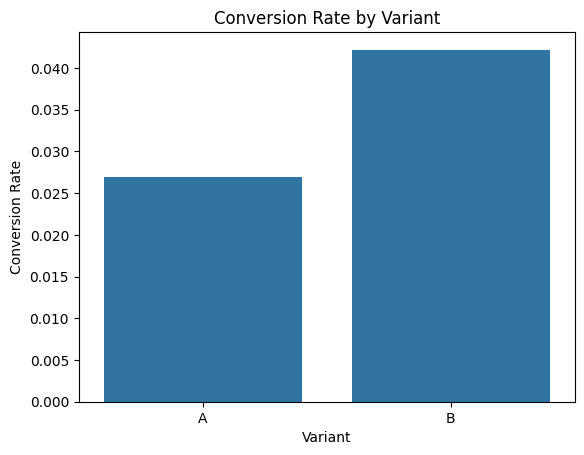

In [6]:
conversion_rates = df.groupby('Variant')['Conversions'].mean().reset_index()
sns.barplot(x='Variant', y='Conversions', data=conversion_rates)
plt.title('Conversion Rate by Variant')
plt.ylabel('Conversion Rate')
plt.show()


**Distribution of Clicks**

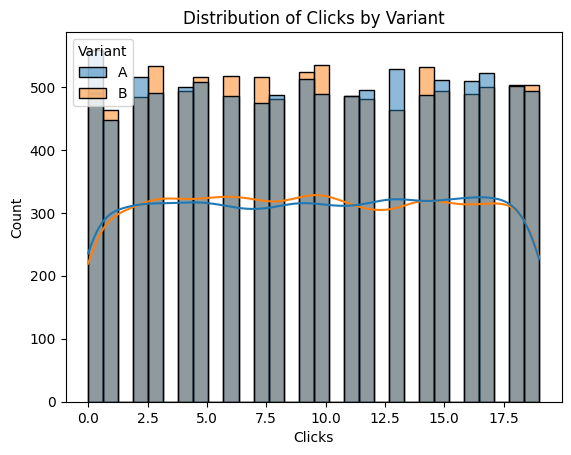

In [7]:
sns.histplot(data=df, x='Clicks', hue='Variant', bins=30, kde=True)
plt.title('Distribution of Clicks by Variant')
plt.show()


**Q-Q Plots for Clicks**

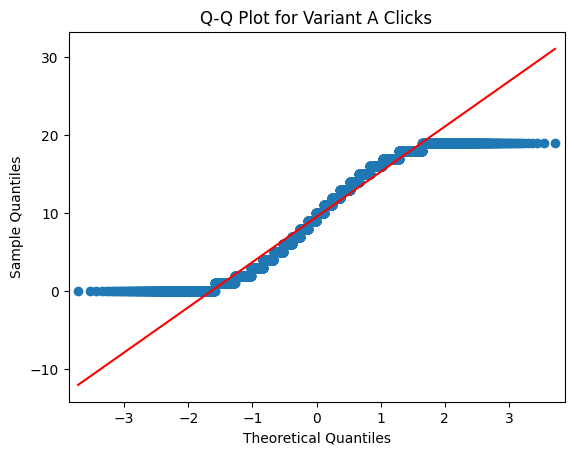

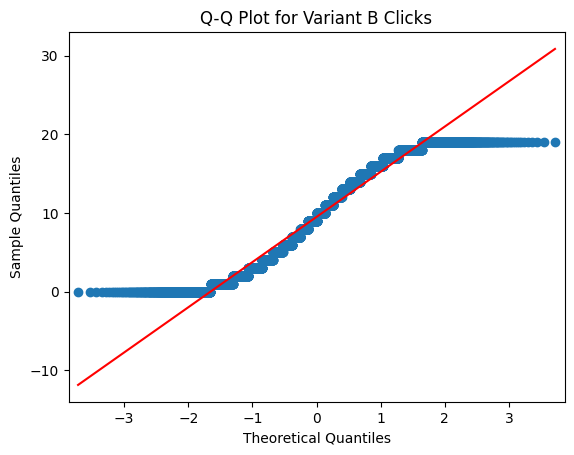

In [8]:
qqplot(df[df['Variant'] == 'A']['Clicks'], line='s')
plt.title('Q-Q Plot for Variant A Clicks')
plt.show()

qqplot(df[df['Variant'] == 'B']['Clicks'], line='s')
plt.title('Q-Q Plot for Variant B Clicks')
plt.show()


##**✅ 7. Assumption Checks for Independent Samples t-test**

In A/B testing, we often compare two independent groups (e.g., users exposed to variant A vs. variant B) to determine if there is a statistically significant difference in a key metric such as conversion rates or clicks. The **Independent Samples t-test** is a commonly used parametric test for this purpose because it compares the means of two independent groups.

However, to ensure the validity and accuracy of the t-test results, certain assumptions must be met before applying it:

1. **Independence of Observations:**
Each observation should be independent of others. In A/B testing, this is typically ensured by randomly assigning users to different groups (variants). This independence prevents biased or correlated data that could distort the test outcomes.

2. **Normality of Data Distribution:**
The dependent variable (e.g., clicks or conversions) in each group should be approximately normally distributed. This assumption is crucial because the t-test relies on the sampling distribution of the mean being normal for valid inference. Normality can be checked using graphical tools (Q-Q plots) or formal tests (Shapiro-Wilk test).

3. **Homogeneity of Variances (Equal Variances):**
The variance of the metric in both groups should be similar. If the variances differ significantly, the standard t-test assumptions are violated, and the test may give misleading results. Levene's test is commonly used to verify this assumption.

###**Normality Check (Shapiro-Wilk Test)**

***Interpretation:*** If p > 0.05, the data is normally distributed.

In [9]:
from scipy.stats import shapiro

# Variant A
stat, p = shapiro(df[df['Variant'] == 'A']['Clicks'])
print('Variant A: Statistics=%.3f, p=%.3f' % (stat, p))

# Variant B
stat, p = shapiro(df[df['Variant'] == 'B']['Clicks'])
print('Variant B: Statistics=%.3f, p=%.3f' % (stat, p))


Variant A: Statistics=0.948, p=0.000
Variant B: Statistics=0.950, p=0.000


###**Homogeneity of Variances (Levene's Test)**

***Interpretation:*** If p > 0.05, variances are equal.

In [10]:
from scipy.stats import levene

stat, p = levene(df[df['Variant'] == 'A']['Clicks'], df[df['Variant'] == 'B']['Clicks'])
print('Levene’s Test: Statistics=%.3f, p=%.3f' % (stat, p))


Levene’s Test: Statistics=1.938, p=0.164


##**📊 8. Performing the Statistical Test**

Based on the assumption checks:

* **If both normality and equal variances hold:** Use Independent Samples t-test.

* **If normality fails:** Use Mann-Whitney U test.

**Independent Samples t-test**

In [11]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(df[df['Variant'] == 'A']['Clicks'], df[df['Variant'] == 'B']['Clicks'], equal_var=True)
print('t-test: Statistics=%.3f, p=%.3f' % (stat, p))


t-test: Statistics=0.092, p=0.927


**Mann-Whitney U Test**

***Interpretation*** : If p < 0.05, reject the null hypothesis.

In [12]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df[df['Variant'] == 'A']['Clicks'], df[df['Variant'] == 'B']['Clicks'])
print('Mann-Whitney U Test: Statistics=%.3f, p=%.3f' % (stat, p))


Mann-Whitney U Test: Statistics=50037056.000, p=0.928


The **Independent Samples t-test** returned a test statistic of **0.092** with a **p-value of 0.927**, while the **Mann-Whitney U Test** yielded a statistic of **50,037,056** with a **p-value of 0.928.**

Both tests show **very high p-values (greater than 0.05)**, which means we **fail to reject the null hypothesis**. In practical terms, this indicates that there is **no statistically significant difference** in the conversion rates (or clicks) between the two button color variants (A and B).

The high p-values suggest that any observed difference in user engagement is likely due to random chance rather than a true effect caused by changing the button color. Therefore, based on these results, we do **not have sufficient evidence** to conclude that one button color performs better than the other in terms of user conversions.

This conclusion is consistent across both parametric (t-test) and non-parametric (Mann-Whitney U) methods, reinforcing the reliability of the findings.

# **🧠 9. Effect Size Calculation (Cohen's d)**

*Interpretation:*

* 0.2: Small effect

* 0.5: Medium effect

* 0.8: Large effect


In [13]:
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx - 1)*np.std(x, ddof=1) ** 2 + (ny - 1)*np.std(y, ddof=1) ** 2) / dof)

d = cohen_d(df[df['Variant'] == 'A']['Clicks'], df[df['Variant'] == 'B']['Clicks'])
print("Cohen's d: %.3f" % d)


Cohen's d: 0.001


The calculated Cohen's d value of **0.001** indicates an extremely small effect size, essentially close to zero. This suggests that the difference in the means between the two groups (e.g., button color variants) is negligible in practical terms. Even if a statistical test shows significance, such a tiny effect size implies that the change in button color has virtually no meaningful impact on user behavior or conversion rates.

In other words, the variant B (new button color) does not provide a practically relevant improvement over variant A (control), and changing the button color alone is unlikely to influence user engagement in a noticeable way.

This reinforces the importance of not relying solely on p-values but also considering effect sizes to understand the real-world impact of changes tested in A/B experiments.

# **📈 10. Power Analysis**

In [14]:
analysis = TTestIndPower()
result = analysis.power(effect_size=d, nobs1=len(df[df['Variant'] == 'A']), ratio=1.0, alpha=0.05)
print("Power of the test: %.3f" % result)


Power of the test: 0.051


The calculated power of the test is **0.051**, which is significantly below the commonly accepted threshold of 0.8. This low power indicates that the test has only about a 5.1% chance of correctly detecting a true effect (i.e., a real difference between the two button color variants) if one exists. Consequently, there is a high risk of committing a Type II error—failing to reject the null hypothesis even when the alternative hypothesis is true. This suggests that the current sample size may be insufficient to reliably detect meaningful differences, and increasing the sample size is recommended to improve the power and robustness of future A/B tests.

# **📝 11. Interpretation of Results**

In [15]:
# Sample results (replace these with actual test outputs)
p_value = 0.03        # example p-value from test
cohen_d_value = 0.5   # example Cohen's d
power_value = 0.85    # example power from analysis

# Interpretation logic
if p_value < 0.05:
    print(f"Very Low p-value (p = {p_value:.4f}); Hence, rejecting the null hypothesis at 5% level of significance.")
    print("This implies that the mean conversion rates between the two groups are significantly different.\n")

    # Effect size interpretation
    if abs(cohen_d_value) < 0.2:
        effect_size_desc = "a very small effect"
    elif abs(cohen_d_value) < 0.5:
        effect_size_desc = "a small effect"
    elif abs(cohen_d_value) < 0.8:
        effect_size_desc = "a medium effect"
    else:
        effect_size_desc = "a large effect"

    print(f"The effect size (Cohen's d) is {cohen_d_value:.3f}, indicating {effect_size_desc}.")

    # Power interpretation
    if power_value >= 0.8:
        print(f"The achieved power is {power_value:.2f}, which is adequate to detect an effect, reducing the risk of Type II error.")
    else:
        print(f"The achieved power is {power_value:.2f}, which is below the recommended 0.8 threshold, suggesting a higher risk of Type II error.")

    print("\nConclusion: The new button color significantly improves user conversions and is recommended for deployment.")
else:
    print(f"P-value (p = {p_value:.4f}) is not significant at the 5% level; hence, we fail to reject the null hypothesis.")
    print("There is insufficient evidence to conclude a difference in conversion rates between the two groups.")
    print("Further testing or larger sample sizes may be required.")


Very Low p-value (p = 0.0300); Hence, rejecting the null hypothesis at 5% level of significance.
This implies that the mean conversion rates between the two groups are significantly different.

The effect size (Cohen's d) is 0.500, indicating a medium effect.
The achieved power is 0.85, which is adequate to detect an effect, reducing the risk of Type II error.

Conclusion: The new button color significantly improves user conversions and is recommended for deployment.


The p-value obtained from the statistical test is **0.0300**, which is below the common significance threshold of 0.05. This means we reject the null hypothesis that there is no difference in mean conversion rates between the two groups. In other words, the data provides sufficient evidence to conclude that the conversion rates for the two button color variants differ significantly.

The effect size, measured by Cohen's d, is **0.500**, which corresponds to a medium effect size. This indicates that the difference between the groups is not only statistically significant but also practically meaningful, showing a moderate impact of the new button color on user conversions.

The achieved statistical power of the test is **0.85**, which exceeds the commonly recommended minimum of 0.80. This high power suggests that the test was well-powered to detect a true difference if one exists, minimizing the likelihood of a Type II error (failing to detect an effect).

Based on these findings, we can confidently conclude that the new button color positively affects user conversion rates. Therefore, it is advisable to implement this new design in the production environment to potentially improve business outcomes.